In [100]:
#get info from the website and save it to csv
import requests 
from bs4 import BeautifulSoup
import csv
import time
from fake_useragent import UserAgent

csv_file=open('./movieInfo.csv', 'w', newline='',encoding='utf-8')
writer = csv.writer(csv_file)
writer.writerow(['Name', 'Rating','Area','Year','Director','Actor','Genre','Comment'])

headers={
    'User-Agent':"Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.17 (KHTML, like Gecko) Chrome/24.0.1312.60 Safari/537.17"
}
url='https://movie.douban.com/top250?start='

for i in range(10):
    urls = url + str(i*25)  
    res=requests.get(urls,headers= headers)
    bs=BeautifulSoup(res.text,'html.parser')
    movie_list=bs.select("div.info")
    for one in movie_list:
        #movie_name
        name=one.find("span", class_="title").text
        
        #mixed info
        movie_info=one.find("div",class_="bd").find("p").text.strip()
        movie_info_split=movie_info.split("\n")#split by <br> 
        info_split_1=movie_info_split[0].strip()#directors_actors
        info_split_2=movie_info_split[1].strip()#year_area_genre
        
        info_1=info_split_1.split("\xa0\xa0\xa0")#split by &nbsp&nbsp&nbsp
        director_1=info_1[0]
        #director
        director=director_1.split(":")[1].strip()#director:xxx
        
        if "\xa0\xa0\xa0" in info_split_1:
            if ":" in info_1[1]:
                #actor
                actor=info_1[1].split(":")[1].strip()#actor:xxx
            else:
                actor=' '
        else:
            actor=' '
        
        
        info_2 = info_split_2.split("/")   #year area genre split by '/'
        year = info_2[0].strip()
        #year
        year=year.strip("(中国大陆)")#deal with the '1981(中国大陆)'
        #area
        area=info_2[-2].strip()
        #genre
        genre = info_2[-1].strip()
        #rating
        rating=one.find('span',class_='rating_num').text
        
        #comment
        if one.find('span',class_="inq") != None:
            comment=one.find('span',class_= 'inq').text
        else:
            comment=' '
        writer.writerow([ name, rating,area, year, director, actor, genre,' '])   
csv_file.close()


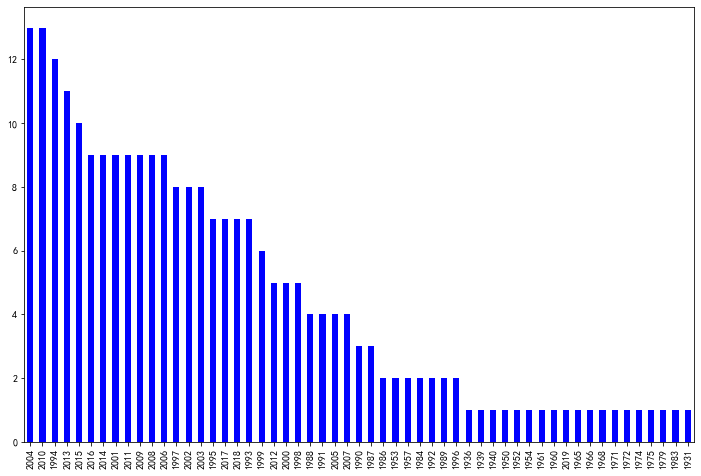

In [101]:
#using pandas to visualize Ⅰ. year
import pandas as pd
import matplotlib.pyplot as plot
df=pd.read_csv('./movieInfo.csv',encoding='utf-8')
df['Year'].value_counts().plot(kind='bar',figsize=(12,8),color='b')



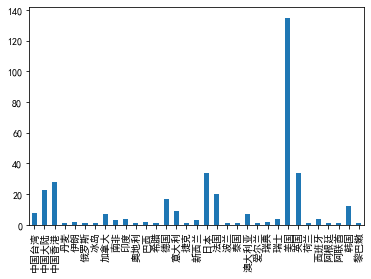

In [102]:
#using pandas to visualize Ⅱ. area
area_split=df['Area'].str.split(' ').apply(pd.Series)
a = area_split.apply(pd.value_counts)
area_count = a.sum(axis=1)
area_df = pd.DataFrame(area_count, columns=['count'], dtype=int)
area_df.plot.bar(legend=False)